In [1]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy as sc                                                                                 
from time import time                                                       
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
sc.settings.set_figure_params(dpi=300)  
print(sys.version)
sc.logging.print_versions()
desc.__version__
import tensorflow as tf
tf.__version__

3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) 
[GCC 7.5.0]
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.7.2
sinfo       0.3.4
-----
2f7ece400a652629565c523b34ee61b04afa385c    NA
PIL                                         8.4.0
absl                                        NA
astunparse                                  1.6.3
backcall                                    0.2.0
cached_property                             1.5.2
certifi                                     2021.05.30
charset_normalizer            

'2.6.2'

In [2]:
sc_test=sc.read_h5ad("/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/mymodel/5_newloaddesc/loaddesc_0/sc_test.h5ad")
sc_test

AnnData object with n_obs × n_vars = 40712 × 28
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'desc_0.8', 'batch', 'batch_sub', 'data'

In [3]:
sc_test.obs

orig.ident  nCount_RNA  nFeature_RNA  n_counts  \
Z1_F_F1_AAACCTGAGAGACGAA         0.0       963.0         347.0     963.0   
Z1_F_F1_AAACCTGAGGGCTTCC         0.0      1107.0         370.0    1107.0   
Z1_F_F1_AAACCTGCAGGACGTA         0.0       726.0         268.0     726.0   
Z1_F_F1_AAACCTGGTATTCGTG         0.0       370.0         164.0     370.0   
Z1_F_F1_AAACCTGTCAAACCAC         0.0       352.0         153.0     352.0   
...                              ...         ...           ...       ...   
Z3_M_M2_TTTGTCAAGTGGTCCC         2.0       806.0         267.0     806.0   
Z3_M_M2_TTTGTCACATCACAAC         2.0       336.0         160.0     336.0   
Z3_M_M2_TTTGTCACATCGTCGG         2.0      1293.0         330.0    1293.0   
Z3_M_M2_TTTGTCAGTAACGACG         2.0      1065.0         211.0    1065.0   
Z3_M_M2_TTTGTCATCTCAAGTG         2.0       262.0         119.0     262.0   

                         desc_0.8 batch batch_sub      data  
Z1_F_F1_AAACCTGAGAGACGAA       16    sc       NaN  testdata  
Z1_F_F1_AAACCTGAGGGCTTCC       16    sc       NaN  testdata  
Z1_F_F1_AAACCTGCAGGACGTA        2    sc       NaN  testdata  
Z1_F_F1_AAACCTGGTATTCGTG        2    sc       NaN  testdata  
Z1_F_F1_AAACCTGTCAAACCAC        2    sc       NaN  testdata  
...                           ...   ...       ...       ...  
Z3_M_M2_TTTGTCAAGTGGTCCC       11    sc       NaN  testdata  
Z3_M_M2_TTTGTCACATCACAAC        0    sc       NaN  testdata  
Z3_M_M2_TTTGTCACATCGTCGG        5    sc       NaN  testdata  
Z3_M_M2_TTTGTCAGTAACGACG        1    sc       NaN  testdata  
Z3_M_M2_TTTGTCATCTCAAGTG        0    sc       NaN  testdata  

[40712 rows x 8 columns]

In [4]:
sc_test.obs['desc_0.8']

Z1_F_F1_AAACCTGAGAGACGAA    16
Z1_F_F1_AAACCTGAGGGCTTCC    16
Z1_F_F1_AAACCTGCAGGACGTA     2
Z1_F_F1_AAACCTGGTATTCGTG     2
Z1_F_F1_AAACCTGTCAAACCAC     2
                            ..
Z3_M_M2_TTTGTCAAGTGGTCCC    11
Z3_M_M2_TTTGTCACATCACAAC     0
Z3_M_M2_TTTGTCACATCGTCGG     5
Z3_M_M2_TTTGTCAGTAACGACG     1
Z3_M_M2_TTTGTCATCTCAAGTG     0
Name: desc_0.8, Length: 40712, dtype: category
Categories (28, int64): [0, 1, 2, 3, ..., 24, 25, 26, 27]

In [5]:
import math
any(math.isnan(x) for x in sc_test.obs['desc_0.8'])


False

In [6]:
st_test=sc.read_h5ad("/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/mymodel/5_newloaddesc/loaddesc_0/st_test.h5ad")
st_test

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 40236 × 28
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'desc_0.8', 'batch', 'batch_sub', 'data'

In [7]:
st_test.obs

orig.ident  nCount_RNA  nFeature_RNA  n_counts desc_0.8  \
AAACCGTTCGTCCAGG-1         NaN         NaN           NaN    1397.0      NaN   
AAACCTAAGCAGCCGG-1         NaN         NaN           NaN    3117.0      NaN   
AAACGAGACGGTTGAT-1         NaN         NaN           NaN    5128.0      NaN   
AAACGGTTGCGAACTG-1         NaN         NaN           NaN    2561.0      NaN   
AAACTCGGTTCGCAAT-1         NaN         NaN           NaN    3146.0      NaN   
...                        ...         ...           ...       ...      ...   
TTGTGTATGCCACCAA-1         NaN         NaN           NaN    1698.0      NaN   
TTGTGTTTCCCGAAAG-1         NaN         NaN           NaN    2347.0      NaN   
TTGTTCAGTGTGCTAC-1         NaN         NaN           NaN    1711.0      NaN   
TTGTTGTGTGTCAAGA-1         NaN         NaN           NaN     996.0      NaN   
TTGTTTCACATCCAGG-1         NaN         NaN           NaN    4552.0      NaN   

                   batch batch_sub      data  
AAACCGTTCGTCCAGG-1    st      st_1  testdata  
AAACCTAAGCAGCCGG-1    st      st_1  testdata  
AAACGAGACGGTTGAT-1    st      st_1  testdata  
AAACGGTTGCGAACTG-1    st      st_1  testdata  
AAACTCGGTTCGCAAT-1    st      st_1  testdata  
...                  ...       ...       ...  
TTGTGTATGCCACCAA-1    st     st_28  testdata  
TTGTGTTTCCCGAAAG-1    st     st_28  testdata  
TTGTTCAGTGTGCTAC-1    st     st_28  testdata  
TTGTTGTGTGTCAAGA-1    st     st_28  testdata  
TTGTTTCACATCCAGG-1    st     st_28  testdata  

[40236 rows x 8 columns]

In [8]:
mnn=np.load("/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/mymodel/5_newloaddesc/loaddesc_0/mnn.npy" ,allow_pickle=True)
mnn

AAACCGTTCGTCCAGG-1  AAACCTAAGCAGCCGG-1  \
Z1_F_F1_AAACCTGAGAGACGAA               False               False   
Z1_F_F1_AAACCTGAGGGCTTCC               False               False   
Z1_F_F1_AAACCTGCAGGACGTA               False               False   
Z1_F_F1_AAACCTGGTATTCGTG               False               False   
Z1_F_F1_AAACCTGTCAAACCAC               False               False   
...                                      ...                 ...   
Z3_M_M2_TTTGTCAAGTGGTCCC               False               False   
Z3_M_M2_TTTGTCACATCACAAC               False               False   
Z3_M_M2_TTTGTCACATCGTCGG               False               False   
Z3_M_M2_TTTGTCAGTAACGACG               False               False   
Z3_M_M2_TTTGTCATCTCAAGTG               False               False   

                          AAACGAGACGGTTGAT-1  AAACGGTTGCGAACTG-1  \
Z1_F_F1_AAACCTGAGAGACGAA               False               False   
Z1_F_F1_AAACCTGAGGGCTTCC               False               False   
Z1_F_F1_AAACCTGCAGGACGTA               False               False   
Z1_F_F1_AAACCTGGTATTCGTG               False               False   
Z1_F_F1_AAACCTGTCAAACCAC               False               False   
...                                      ...                 ...   
Z3_M_M2_TTTGTCAAGTGGTCCC               False               False   
Z3_M_M2_TTTGTCACATCACAAC               False               False   
Z3_M_M2_TTTGTCACATCGTCGG               False               False   
Z3_M_M2_TTTGTCAGTAACGACG               False               False   
Z3_M_M2_TTTGTCATCTCAAGTG               False               False   

                          AAACTCGGTTCGCAAT-1  AAACTGCTGGCTCCAA-1  \
Z1_F_F1_AAACCTGAGAGACGAA               False               False   
Z1_F_F1_AAACCTGAGGGCTTCC               False               False   
Z1_F_F1_AAACCTGCAGGACGTA               False               False   
Z1_F_F1_AAACCTGGTATTCGTG               False               False   
Z1_F_F1_AAACCTGTCAAACCAC               False               False   
...                                      ...                 ...   
Z3_M_M2_TTTGTCAAGTGGTCCC               False               False   
Z3_M_M2_TTTGTCACATCACAAC               False               False   
Z3_M_M2_TTTGTCACATCGTCGG               False               False   
Z3_M_M2_TTTGTCAGTAACGACG               False               False   
Z3_M_M2_TTTGTCATCTCAAGTG               False               False   

                          AAAGGCTACGGACCAT-1  AAAGGCTCTCGCGCCG-1  \
Z1_F_F1_AAACCTGAGAGACGAA               False               False   
Z1_F_F1_AAACCTGAGGGCTTCC               False               False   
Z1_F_F1_AAACCTGCAGGACGTA               False               False   
Z1_F_F1_AAACCTGGTATTCGTG               False               False   
Z1_F_F1_AAACCTGTCAAACCAC               False               False   
...                                      ...                 ...   
Z3_M_M2_TTTGTCAAGTGGTCCC               False               False   
Z3_M_M2_TTTGTCACATCACAAC               False               False   
Z3_M_M2_TTTGTCACATCGTCGG               False               False   
Z3_M_M2_TTTGTCAGTAACGACG               False               False   
Z3_M_M2_TTTGTCATCTCAAGTG               False               False   

                          AAAGGGATGTAGCAAG-1  AAAGTGTGATTTATCT-1  ...  \
Z1_F_F1_AAACCTGAGAGACGAA               False               False  ...   
Z1_F_F1_AAACCTGAGGGCTTCC               False               False  ...   
Z1_F_F1_AAACCTGCAGGACGTA               False               False  ...   
Z1_F_F1_AAACCTGGTATTCGTG               False               False  ...   
Z1_F_F1_AAACCTGTCAAACCAC               False               False  ...   
...                                      ...                 ...  ...   
Z3_M_M2_TTTGTCAAGTGGTCCC               False               False  ...   
Z3_M_M2_TTTGTCACATCACAAC               False               False  ...   
Z3_M_M2_TTTGTCACATCGTCGG               False               False  ...   
Z3_M_M2_TTTGTCAGTAACGACG    

In [9]:
indices1=np.load("/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/mymodel/5_newloaddesc/loaddesc_0/indices1.npy" ,allow_pickle=True)
indices1

0      1      2      3      4      5      6      7      8      9    \
0       4964  17897  25082  35141  12149  10712  23645  15023  38015  36578   
1       4964  17897  25082  35141  12149  10712  23645  15023  38015  36578   
2       5301  34041    990  11049  19671  31167  25419  13923   8175  36915   
3       5301  34041    990  11049  19671  31167  25419  13923   8175  36915   
4       5301  34041    990  11049  19671  31167  25419  13923   8175  36915   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
40707  23352   1797  37722  16167  31974  36285  10419  11856  30537   4671   
40708  15206  19517  31013  13769  28139   3710  20954   6584  18080  12332   
40709   6680   3806   5243  21050  23924    932  10991  35420  16739   9554   
40710  30241  17308     64  15871  11560  38863  10123   5812  18745  33115   
40711  15206  19517  31013  13769  28139   3710  20954   6584  18080  12332   

       ...    990    991    992    993    994    995    996    997    998  \
0      ...  36792   6615  13800  23859  25296   5178   3741  15237  32481   
1      ...  36792   6615  13800  23859  25296   5178   3741  15237  32481   
2      ...   2432  32609  16802   3869  31172  12491  26861  11054  22550   
3      ...   2432  32609  16802   3869  31172  12491  26861  11054  22550   
4      ...   2432  32609  16802   3869  31172  12491  26861  11054  22550   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
40707  ...   1768  24760  17575  13264  27634  29071   3205  10390  37693   
40708  ...  30241   2938  23056  17308  12997   4375     64  34552  31678   
40709  ...  34552  12997  15871   2938  33115   5812  20182  14434  35989   
40710  ...  14730   7545    360  30537  19041   6108  33411   3234  39159   
40711  ...  30241   2938  23056  17308  12997   4375     64  34552  31678   

         999  
0       8052  
1       8052  
2      19676  
3      19676  
4      19676  
...      ...  
40707  21886  
40708  38863  
40709  23056  
40710  34848  
40711  38863  

[40712 rows x 1000 columns]

In [10]:
indices2=np.load("/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/mymodel/5_newloaddesc/loaddesc_0/indices2.npy" ,allow_pickle=True)
indices2

0      1      2      3      4      5      6      7      8      9    \
0       6342  14404   5048  21222  28266  13612  13177   3874   4435   3795   
1       6342    774   1222   5416   2848   3216   6623   6404   5214  21230   
2      21085  18207  14735  17281  22150  17009  15671  18845  15591   5224   
3       6342  14404   5048  21222  13612  28266  13177   3874   4435   3795   
4       4527  15072   5171   2011   3160  27755   2556   5605    172   5341   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
40231  20214  16519  18635  28130  29260  23582  29815  34829  19616   3035   
40232  18635  20214  16519  28130    871  34829  29260  23582  19616  29815   
40233   6342  14404  21222   5048  13612  28266  13177   3874   4435  23052   
40234   6594  17274    892   3983   5641     20   1166   2731   2067    436   
40235   6342  14404   5048  21222  13612  28266  13177    774   3874   4435   

       ...    990    991    992    993    994    995    996    997    998  \
0      ...   2982  13484  10646   6261   9595   9241   2190   9062  10140   
1      ...   4863   8304  10068  12170   7229   8181   8800  13679    720   
2      ...  36444   6393  23021  29487  20722  25180  20336  38550  37608   
3      ...  21318  10991   6261   9241  13484  12539   9062  10646   2190   
4      ...   3376  20382   2206   5198   5014   6614    362   6695   3995   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
40231  ...  19687  15414  19891  20010  18323  17425   6571  16247  27554   
40232  ...  18267  27174  19204  21301  19891  15414  19687  18323  17030   
40233  ...   2982   9595  13484  10646   6261   9062   9241  10140   2190   
40234  ...   5353  18582  16789  21129    911   3589   4419    597   2842   
40235  ...  10302  27881   3636  10991   7442   2982   6261  21318   2190   

         999  
0       3516  
1       7894  
2      14758  
3      10140  
4       3684  
...      ...  
40231  17030  
40232  17425  
40233  12539  
40234   4905  
40235   9595  

[40236 rows x 1000 columns]

In [11]:
indices2.index=st_test.obs_names

In [12]:
top10=indices2.iloc[:,:10]
top10

0      1      2      3      4      5      6      7  \
AAACCGTTCGTCCAGG-1   6342  14404   5048  21222  28266  13612  13177   3874   
AAACCTAAGCAGCCGG-1   6342    774   1222   5416   2848   3216   6623   6404   
AAACGAGACGGTTGAT-1  21085  18207  14735  17281  22150  17009  15671  18845   
AAACGGTTGCGAACTG-1   6342  14404   5048  21222  13612  28266  13177   3874   
AAACTCGGTTCGCAAT-1   4527  15072   5171   2011   3160  27755   2556   5605   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
TTGTGTATGCCACCAA-1  20214  16519  18635  28130  29260  23582  29815  34829   
TTGTGTTTCCCGAAAG-1  18635  20214  16519  28130    871  34829  29260  23582   
TTGTTCAGTGTGCTAC-1   6342  14404  21222   5048  13612  28266  13177   3874   
TTGTTGTGTGTCAAGA-1   6594  17274    892   3983   5641     20   1166   2731   
TTGTTTCACATCCAGG-1   6342  14404   5048  21222  13612  28266  13177    774   

                        8      9  
AAACCGTTCGTCCAGG-1   4435   3795  
AAACCTAAGCAGCCGG-1   5214  21230  
AAACGAGACGGTTGAT-1  15591   5224  
AAACGGTTGCGAACTG-1   4435   3795  
AAACTCGGTTCGCAAT-1    172   5341  
...                   ...    ...  
TTGTGTATGCCACCAA-1  19616   3035  
TTGTGTTTCCCGAAAG-1  19616  29815  
TTGTTCAGTGTGCTAC-1   4435  23052  
TTGTTGTGTGTCAAGA-1   2067    436  
TTGTTTCACATCCAGG-1   3874   4435  

[40236 rows x 10 columns]

In [13]:
list(top10.iloc[0])

[6342, 14404, 5048, 21222, 28266, 13612, 13177, 3874, 4435, 3795]

In [14]:
sc_test[sc_test.obs_names[list(top10.iloc[0])]].obs['desc_0.8']

Z1_F_F2_TAGACCAGTAACGCGA    10
Z1_M_M2_TTTGCGCCACGGTGTC    10
Z1_F_F2_CGGACTGAGGAGTCTG    10
Z2_F_F2_TTAGGACCATCACGTA    10
Z2_M_M2_TGCACCTCAACCGCCA    10
Z1_M_M2_TAGGCATGTATAAACG    10
Z1_M_M2_GGTGTTAGTCCGACGT    10
Z1_F_F2_ACACCAAAGTGTCCAT    10
Z1_F_F2_CAACCTCAGGCTAGGT    10
Z1_F_F2_AACGTTGAGCTGATAA    10
Name: desc_0.8, dtype: category
Categories (1, int64): [10]

In [15]:
#indices2前10个对应的sc的celltype
#sc_index对应的celltype
indices = list(range(len(st_test.obs_names)))
#indices.index=st_test.obs_names
for i in range(len(st_test.obs_names)):
    #if math.isnan(float(sc_test[sc_test.obs_names[list(top10.iloc[i])]].obs['desc_0.2'])):
        #indices[i]=[]
    #else:
        indices[i]=list(sc_test[sc_test.obs_names[list(top10.iloc[i])]].obs['desc_0.8'].astype(str))

In [16]:
indices

[['10', '10', '10', '10', '10', '10', '10', '10', '10', '10'],
 ['10', '16', '16', '16', '16', '16', '16', '16', '16', '16'],
 ['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
 ['10', '10', '10', '10', '10', '10', '10', '10', '10', '10'],
 ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16'],
 ['4', '4', '4', '4', '4', '4', '4', '4', '4', '4'],
 ['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
 ['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
 ['6', '6', '6', '6', '6', '6', '6', '6', '6', '6'],
 ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16'],
 ['3', '3', '3', '3', '3', '3', '3', '3', '3', '3'],
 ['19', '19', '19', '19', '19', '19', '19', '19', '19', '19'],
 ['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
 ['19', '19', '19', '19', '19', '19', '19', '19', '19', '19'],
 ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16'],
 ['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
 ['10', '10', '10', '1

In [17]:
#for i in range(38818):
#    print(any(math.isnan(x) for x in indices[i]))


In [18]:
st_test.obs['sc_index']=indices

In [19]:
st_test.obs['sc_index']

AAACCGTTCGTCCAGG-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
AAACCTAAGCAGCCGG-1    [10, 16, 16, 16, 16, 16, 16, 16, 16, 16]
AAACGAGACGGTTGAT-1    [22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
AAACGGTTGCGAACTG-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
AAACTCGGTTCGCAAT-1    [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
                                        ...                   
TTGTGTATGCCACCAA-1              [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
TTGTGTTTCCCGAAAG-1              [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
TTGTTCAGTGTGCTAC-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
TTGTTGTGTGTCAAGA-1    [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
TTGTTTCACATCCAGG-1    [10, 10, 10, 10, 10, 10, 10, 16, 10, 10]
Name: sc_index, Length: 40236, dtype: object

In [20]:
#合并重复索引，合并对应的list
def merge_lists(x):
    merged_list = []
    for sublist in x:
        merged_list.extend(sublist)
    return merged_list

# 使用groupby和agg合并重复索引，并合并对应的列表
merged_df = st_test.obs.groupby(st_test.obs_names).agg({'sc_index': merge_lists})
merged_df

sc_index
AAACCGTTCGTCCAGG-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
AAACCTAAGCAGCCGG-1  [10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 10, 1...
AAACGAGACGGTTGAT-1  [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...
AAACGGTTGCGAACTG-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
AAACTCGGTTCGCAAT-1  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
...                                                               ...
TTGTGTATGCCACCAA-1  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
TTGTGTTTCCCGAAAG-1  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
TTGTTCAGTGTGCTAC-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
TTGTTGTGTGTCAAGA-1  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
TTGTTTCACATCCAGG-1  [10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 1...

[1437 rows x 1 columns]

In [21]:
type(merged_df['sc_index'][0][0])

str

In [22]:
#for i in range(2986):
#    print(any(math.isnan(x) for x in merged_df['sc_index'][i]))

In [23]:
stt = sc.read_visium(path='/home/huggs/shiyi/SCST/RCTD/RCTD/predata/celltrek_kidney/celltrek_kidney/V1_Mouse_Kidney',count_file='filtered_feature_bc_matrix.h5', load_images=True)
stt

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1438 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [24]:
stt.obs

in_tissue  array_row  array_col
AAACCGTTCGTCCAGG-1          1         52         42
AAACCTAAGCAGCCGG-1          1         65         83
AAACGAGACGGTTGAT-1          1         35         79
AAACGGTTGCGAACTG-1          1         67         59
AAACTCGGTTCGCAAT-1          1         66         70
...                       ...        ...        ...
TTGTGTATGCCACCAA-1          1         56         60
TTGTGTTTCCCGAAAG-1          1         51         59
TTGTTCAGTGTGCTAC-1          1         24         64
TTGTTGTGTGTCAAGA-1          1         31         77
TTGTTTCACATCCAGG-1          1         58         42

[1438 rows x 3 columns]

In [25]:
stt.obs['sc_index']=merged_df['sc_index']
stt.obs

in_tissue  array_row  array_col  \
AAACCGTTCGTCCAGG-1          1         52         42   
AAACCTAAGCAGCCGG-1          1         65         83   
AAACGAGACGGTTGAT-1          1         35         79   
AAACGGTTGCGAACTG-1          1         67         59   
AAACTCGGTTCGCAAT-1          1         66         70   
...                       ...        ...        ...   
TTGTGTATGCCACCAA-1          1         56         60   
TTGTGTTTCCCGAAAG-1          1         51         59   
TTGTTCAGTGTGCTAC-1          1         24         64   
TTGTTGTGTGTCAAGA-1          1         31         77   
TTGTTTCACATCCAGG-1          1         58         42   

                                                             sc_index  
AAACCGTTCGTCCAGG-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...  
AAACCTAAGCAGCCGG-1  [10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 10, 1...  
AAACGAGACGGTTGAT-1  [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...  
AAACGGTTGCGAACTG-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...  
AAACTCGGTTCGCAAT-1  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...  
...                                                               ...  
TTGTGTATGCCACCAA-1  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...  
TTGTGTTTCCCGAAAG-1  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...  
TTGTTCAGTGTGCTAC-1  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...  
TTGTTGTGTGTCAAGA-1  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...  
TTGTTTCACATCCAGG-1  [10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 1...  

[1438 rows x 4 columns]

In [26]:
##spot所有的sc_celltype统计，频数最高的赋给spot
print(len(stt.obs['sc_index'][0]))
pd.value_counts(stt.obs['sc_index'][0]).index[0]

280


'10'

In [27]:
type(stt.obs['sc_index'][20][0])

str

In [28]:
pd.value_counts(stt.obs['sc_index'][1]).index[0]

'16'

In [29]:
stt.obs['sc_index'].dropna(axis=0, how='any')

AAACCGTTCGTCCAGG-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
AAACCTAAGCAGCCGG-1    [10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 10, 1...
AAACGAGACGGTTGAT-1    [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...
AAACGGTTGCGAACTG-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
AAACTCGGTTCGCAAT-1    [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
                                            ...                        
TTGTGTATGCCACCAA-1    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
TTGTGTTTCCCGAAAG-1    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
TTGTTCAGTGTGCTAC-1    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...
TTGTTGTGTGTCAAGA-1    [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
TTGTTTCACATCCAGG-1    [10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 1...
Name: sc_index, Length: 1437, dtype: object

In [30]:
import math
mm= list(range(len(stt.obs_names)-1))
for i in range(len(stt.obs_names)-1): 
    mm[i]=pd.value_counts(stt.obs['sc_index'].dropna(axis=0, how='any')[i]).index[0]

In [31]:
mm

['10',
 '16',
 '22',
 '10',
 '16',
 '4',
 '22',
 '22',
 '6',
 '16',
 '3',
 '19',
 '22',
 '19',
 '16',
 '22',
 '10',
 '10',
 '19',
 '16',
 '16',
 '16',
 '10',
 '16',
 '4',
 '22',
 '3',
 '16',
 '16',
 '10',
 '16',
 '16',
 '10',
 '22',
 '4',
 '10',
 '16',
 '10',
 '16',
 '19',
 '22',
 '22',
 '22',
 '22',
 '16',
 '4',
 '16',
 '4',
 '16',
 '4',
 '22',
 '16',
 '16',
 '16',
 '10',
 '19',
 '16',
 '16',
 '4',
 '10',
 '22',
 '16',
 '16',
 '21',
 '16',
 '22',
 '3',
 '4',
 '22',
 '10',
 '16',
 '4',
 '10',
 '22',
 '4',
 '4',
 '4',
 '16',
 '4',
 '4',
 '22',
 '22',
 '22',
 '4',
 '10',
 '4',
 '10',
 '10',
 '10',
 '10',
 '10',
 '16',
 '22',
 '16',
 '22',
 '10',
 '3',
 '16',
 '4',
 '4',
 '10',
 '3',
 '4',
 '22',
 '22',
 '16',
 '4',
 '16',
 '22',
 '10',
 '16',
 '10',
 '4',
 '10',
 '22',
 '2',
 '10',
 '16',
 '22',
 '22',
 '10',
 '22',
 '16',
 '16',
 '10',
 '17',
 '16',
 '16',
 '16',
 '22',
 '4',
 '0',
 '10',
 '22',
 '16',
 '16',
 '4',
 '4',
 '4',
 '22',
 '16',
 '4',
 '10',
 '22',
 '10',
 '17',
 '6',
 '16',

In [32]:
len(mm)

1437

In [33]:
aaa=stt.obs['sc_index'].dropna(axis=0, how='any')
aaa.index

Index(['AAACCGTTCGTCCAGG-1', 'AAACCTAAGCAGCCGG-1', 'AAACGAGACGGTTGAT-1',
       'AAACGGTTGCGAACTG-1', 'AAACTCGGTTCGCAAT-1', 'AAACTGCTGGCTCCAA-1',
       'AAAGGCTACGGACCAT-1', 'AAAGGCTCTCGCGCCG-1', 'AAAGGGATGTAGCAAG-1',
       'AAAGTGTGATTTATCT-1',
       ...
       'TTGTAATCCGTACTCG-1', 'TTGTCGTTCAGTTACC-1', 'TTGTGAACCTAATCCG-1',
       'TTGTGCAGCCACGTCA-1', 'TTGTGGTAGGAGGGAT-1', 'TTGTGTATGCCACCAA-1',
       'TTGTGTTTCCCGAAAG-1', 'TTGTTCAGTGTGCTAC-1', 'TTGTTGTGTGTCAAGA-1',
       'TTGTTTCACATCCAGG-1'],
      dtype='object', length=1437)

In [34]:
newstt=stt[aaa.index]
newstt.obs['sc_celltype']=mm

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [40]:
newstt.obs['sc_celltype'].value_counts()

16    428
22    334
10    214
4     212
19    110
3      57
17     31
0      16
21     12
7       7
2       6
14      4
6       2
24      1
5       1
23      1
11      1
Name: sc_celltype, dtype: int64

... storing 'sc_celltype' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


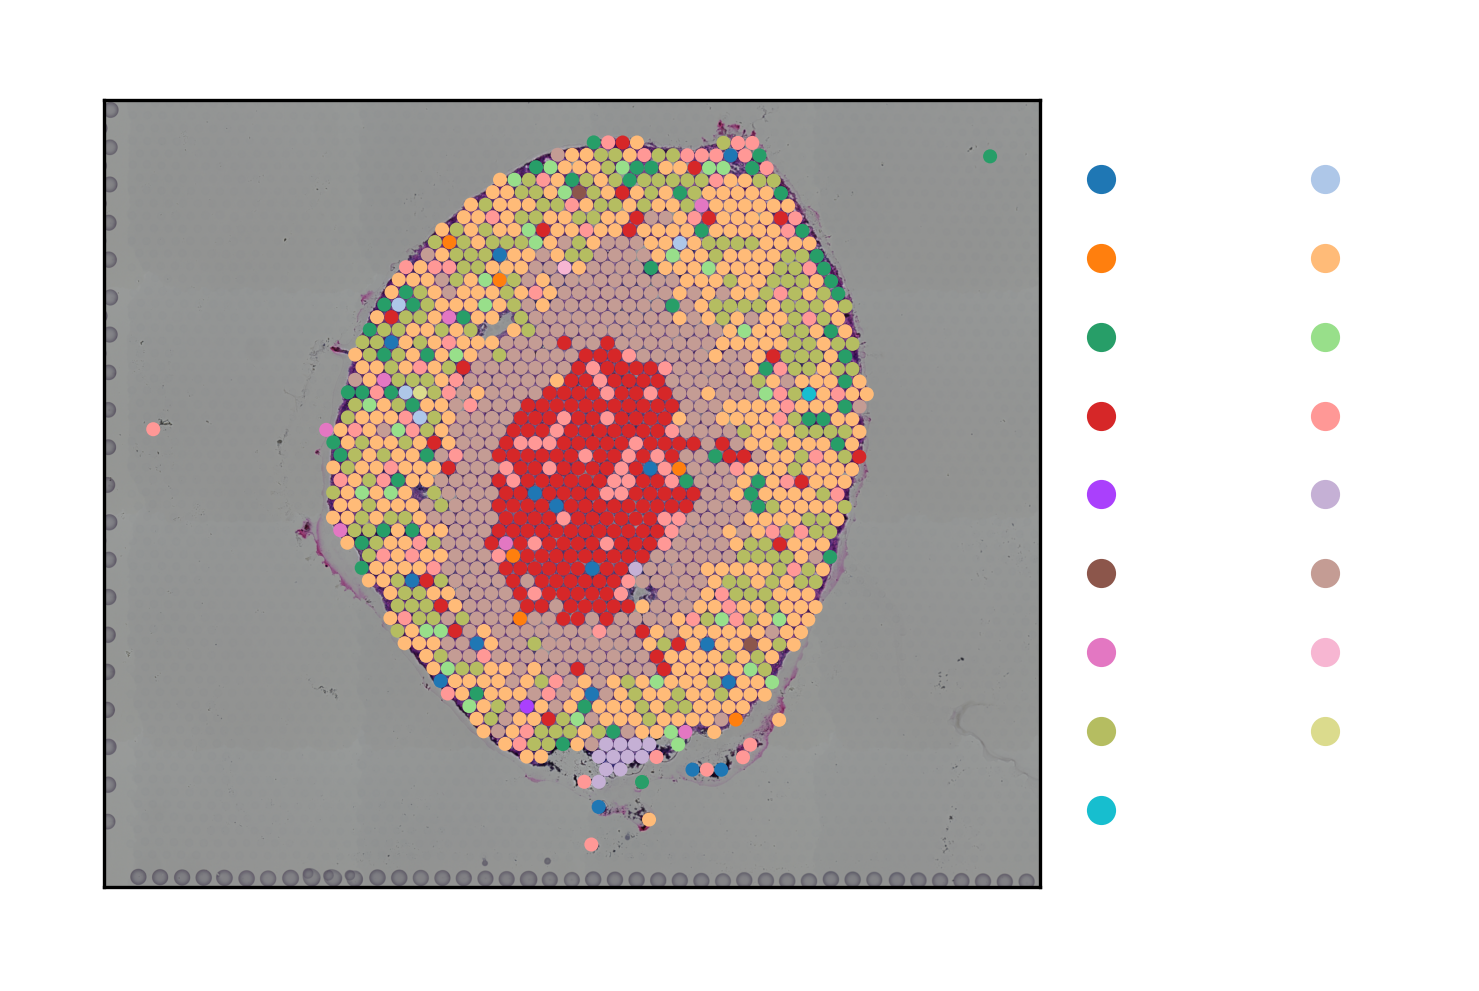

In [35]:
sc.pl.spatial(newstt, img_key="hires", color="sc_celltype", size=1.5)

In [36]:
del newstt.obs['sc_index']


In [37]:
newstt.write_h5ad("plot_st_newmnn.h5ad")

In [38]:
##########################################################

In [39]:
#sc_index对应的celltype
indices1 = list(range(len(stt.obs_names)))
#indices.index=st_test.obs_names
for i in range(len(stt.obs_names)):
    indices1[i]=list(sc_test[sc_test.obs_names[merged_df['sc_index'][i]]].obs['annotation_1'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
indices1

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Micro',
  'Nb_2',
  'Micro',
  'Nb_2',
  'Micro',
  'Nb_2',
  'Inh_6',
  'Ext_Thal_1',
  'Ext_Amy_1',
  'LowQ_2',
  'LowQ_2',
  'Nb_2',
  'Nb_1',
  'Ext_Thal_1',
  'Ext_Thal_2',
  'Inh_3',
  'Unk_1',
  'Ext_Thal_2',
  'Inh_6',
  'Ext_Amy_1',
  'Ext_Thal_1',
  'Ext_Unk_1',
  'Ext_Unk_1',
  'Ext_Unk_1',
  'Unk_1',
  'Ext_Thal_1',
  'Nb_1',
  'Inh_4',
  'Ext_Unk_1',
  'Unk_1',
  'Unk_1',
  'LowQ_2',
  'Inh_6',
  'Ext_Unk_1',
  'Ext_Thal_2',
  'OPC_1',
  'Ext_Amy_1',
  'Ext_Unk_1',
  'Inh_6',
  'Inh_6',
  'Inh_1',
  'Nb_1',
  'Ext_Thal_2',
  'Unk_1',
  'Ext_Pir',
  'OPC_1',
  'Ext_Thal_2',
  'Ext_Amy_1',
  'Unk_1',
  'Ext_Unk_1',
  'LowQ_2',
  'Ext_Thal_1',
  'Ext_Thal_2',
  'Ext_L56',
  'Inh_2',
  'Nb_1',
  'Nb_2',
  'Nb_1',
  'Ext_Thal_1',
  'LowQ_2',
  'LowQ_2',
  'Micro',
  'LowQ_2',
  'Ext_Thal_2',
  'Inh_4',
  'OPC_1',
  'Ext_Amy_1',
  'Inh_4',
  'Inh_6',
  'Inh_Meis2_1',
  'Unk_1',
  'Micro',
  'Ext_Thal_1',
  'Ext_Amy_2

In [ ]:
indices1==stt.obs['sc_index_1']

/home/huggs/anaconda3/envs/SCST/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


AAACAAGTATCTCCCA-1    True
AAACACCAATAACTGC-1    True
AAACAGAGCGACTCCT-1    True
AAACAGCTTTCAGAAG-1    True
AAACAGGGTCTATATT-1    True
                      ... 
TTGTTCAGTGTGCTAC-1    True
TTGTTGTGTGTCAAGA-1    True
TTGTTTCACATCCAGG-1    True
TTGTTTCATTAGTCTA-1    True
TTGTTTCCATACAACT-1    True
Name: sc_index_1, Length: 2987, dtype: bool

... storing 'feature_types' as categorical
... storing 'genome' as categorical


TypeError: bad operand type for unary -: 'list'

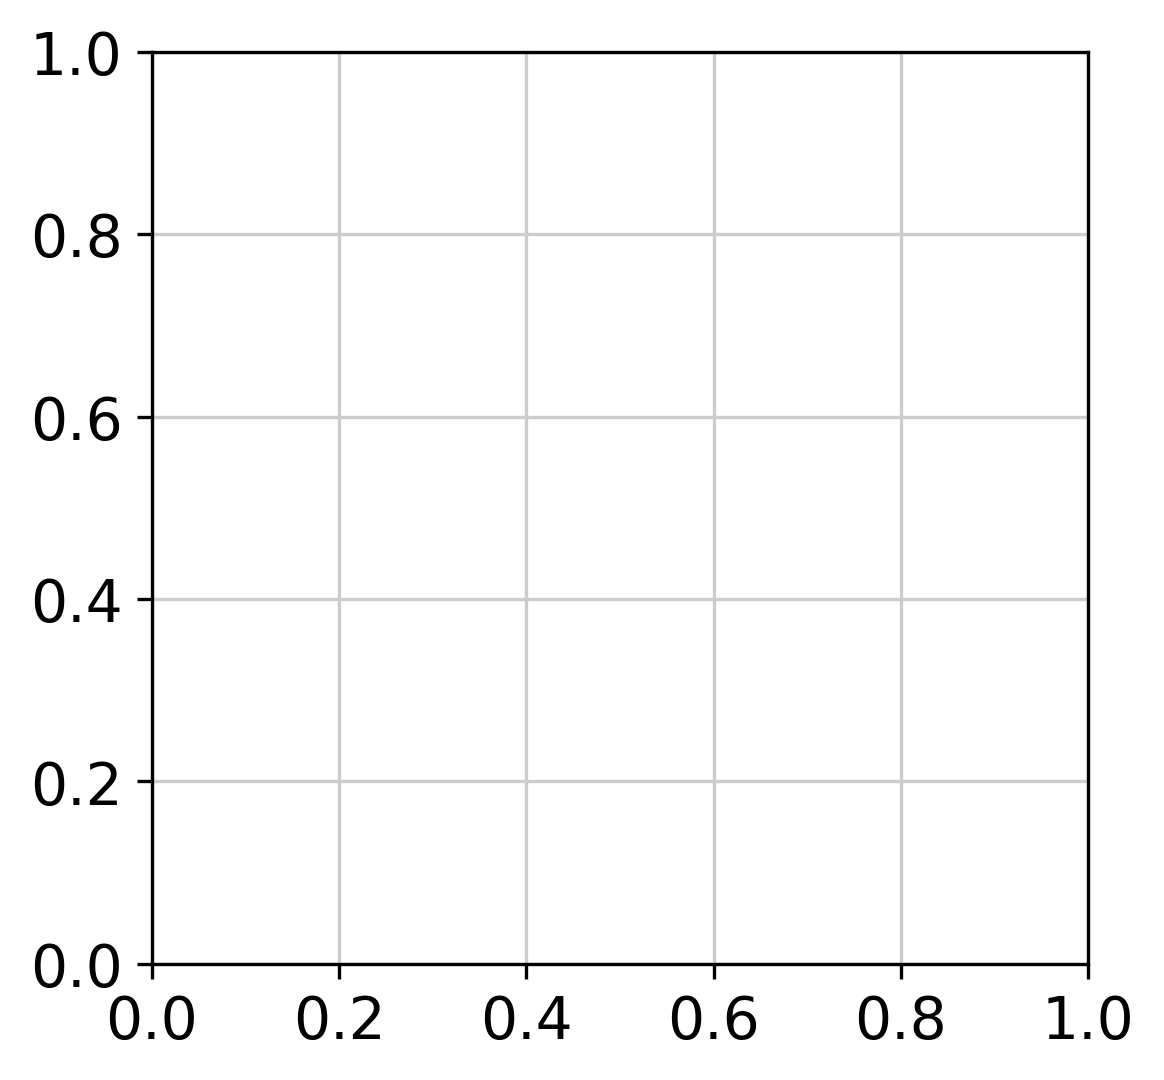

In [ ]:
sc.pl.spatial(stt, img_key="hires", color="sc_celltype", size=1.5)